In [427]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


pd.set_option("display.max_rows", None)
pd.reset_option("display.max_rows")
pd.set_option("display.max_rows", None)

sns.set_palette("dark:#5A9_r")

In [428]:
# a = pd.read_parquet(r"../data/series_train_parquet/id=00115b9f/part-0.parquet")

In [429]:
# a

## Getting the Pad Data

In [430]:
pad = pd.read_csv(r"../data/train.csv")

In [431]:
pad.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#
---
#

## My Functions

In [432]:
def draw_barchart(column):
    a = sns.barplot(
        x=["NULLS" if x is np.nan else x for x in list(map(lambda x : x[0], df[[column]].value_counts(dropna=False).index))], 
        y=df[[column]].value_counts(dropna=False).values
    )
    
    a.bar_label(a.containers[0])
    
    plt.show()

In [433]:
def show_nulls(dataframe):
    nulls = pd.DataFrame({
        "Feature" : dataframe.isnull().sum().index,
        "Nulls" : dataframe.isnull().sum().values,
        "Percent" : list(map(lambda x : f"{x*100:.3f}%", dataframe.isnull().sum().values/dataframe.shape[0]))
    })
    
    # pd.set_option("display.max_rows", None)
    # pd.reset_option("display.max_rows")
    return nulls.sort_values("Nulls", ascending=False)

In [434]:
def draw_boxplot(numData, catData):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=catData, y=numData)
    plt.tight_layout()
    plt.show()

In [435]:
imputer_objects = {}
def fill_nulls(nullsDataFrame, colWithNulls):
    imputer_objects[colWithNulls] = KNNImputer(n_neighbors=1)
    df.loc[:, colWithNulls] = pd.DataFrame(imputer_objects[colWithNulls].fit_transform(nullsDataFrame)).iloc[:,-1]

#
---
#

In [436]:
target = pad["sii"]

In [437]:
pad.drop(columns="sii", inplace=True)

#
---
#

## Checking For Nulls

In [438]:
show_nulls(pad)

,Feature,Nulls,Percent
51,PAQ_A-PAQ_A_Total,3485,88.005%
50,PAQ_A-Season,3485,88.005%
17,Fitness_Endurance-Time_Sec,3220,81.313%
16,Fitness_Endurance-Time_Mins,3220,81.313%
15,Fitness_Endurance-Max_Stage,3217,81.237%
10,Physical-Waist_Circumference,3062,77.323%
22,FGC-FGC_GSND_Zone,2898,73.182%
24,FGC-FGC_GSD_Zone,2897,73.157%
21,FGC-FGC_GSND,2886,72.879%
23,FGC-FGC_GSD,2886,72.879%


#
---
#

## `PreInt_EduHx-Season` is same as `Basic_Demos-Enroll_Season` 
## so Lets remove `PreInt_EduHx-Season`

In [439]:
df = pad.copy()

In [440]:
df.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [441]:
df[["PreInt_EduHx-Season", "Basic_Demos-Enroll_Season"]].head(20)

,PreInt_EduHx-Season,Basic_Demos-Enroll_Season
0,Fall,Fall
1,Summer,Summer
2,Summer,Summer
3,Winter,Winter
4,NaN,Spring
5,Spring,Spring
6,Fall,Fall
7,Fall,Fall
8,Summer,Summer
9,NaN,Summer


In [442]:
df.drop(columns="PreInt_EduHx-Season", inplace=True)

In [443]:
df.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

#
---
#

## FGC-Season

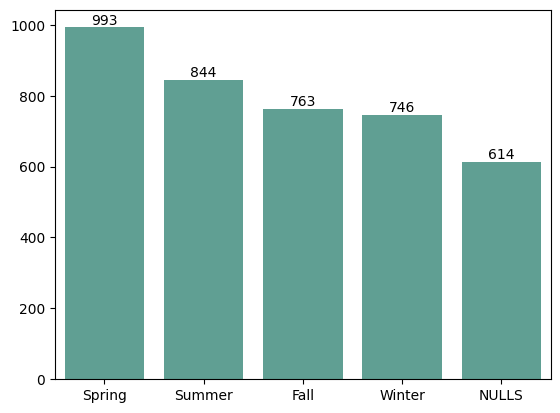

In [444]:
draw_barchart("FGC-Season")

In [445]:
df[["FGC-Season", 'Basic_Demos-Enroll_Season']].head()

,FGC-Season,Basic_Demos-Enroll_Season
0,Fall,Fall
1,Fall,Summer
2,Fall,Summer
3,Summer,Winter
4,NaN,Spring


In [446]:
pd.set_option("display.max_columns", None)

In [447]:
df.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [448]:
seasons_cols = [
    "Basic_Demos-Enroll_Season",
    "CGAS-Season",
    "Physical-Season",
    "Fitness_Endurance-Season",
    "FGC-Season",
    "BIA-Season",
    "PAQ_A-Season",
    "PAQ_C-Season",
    "PCIAT-Season",
    "SDS-Season"
]

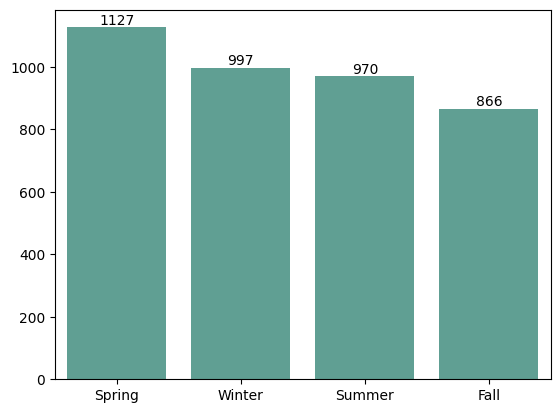

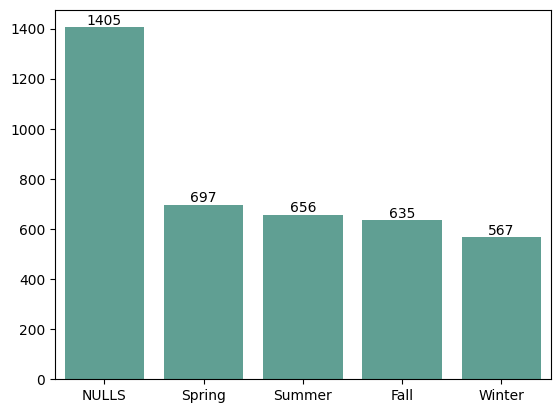

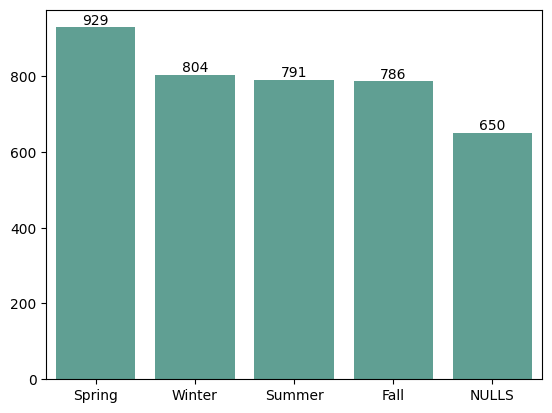

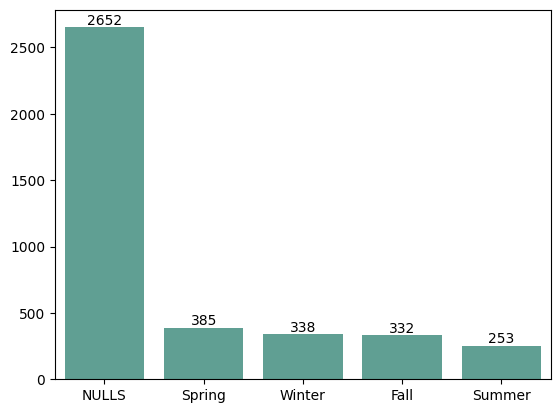

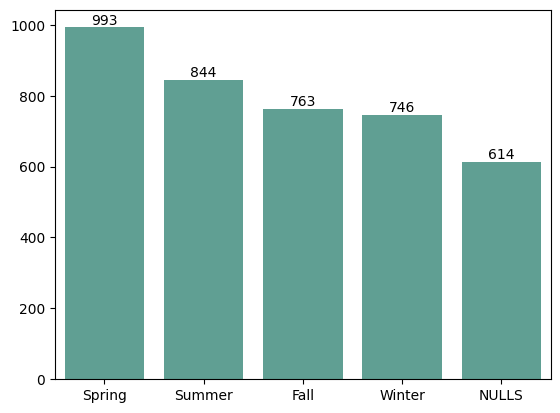

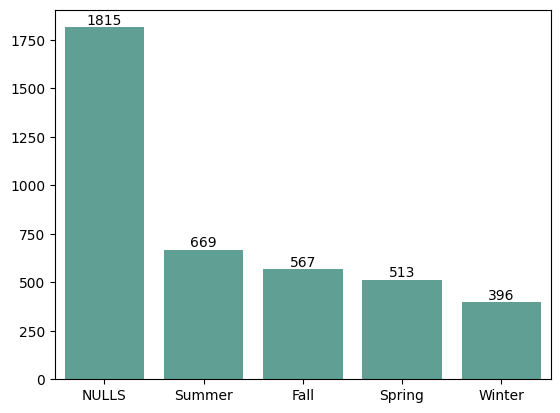

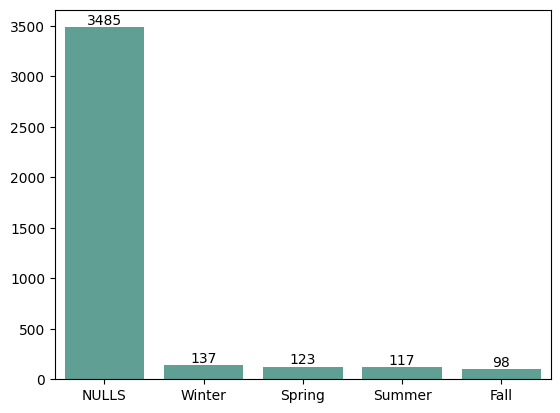

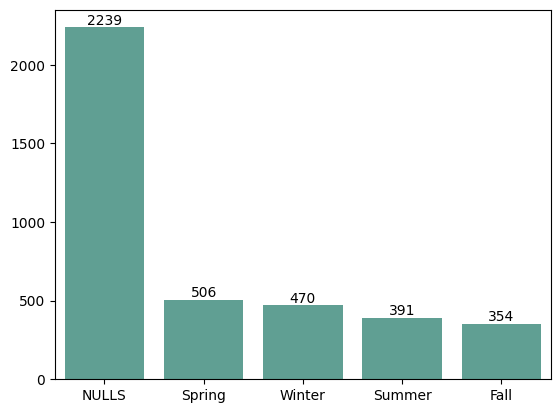

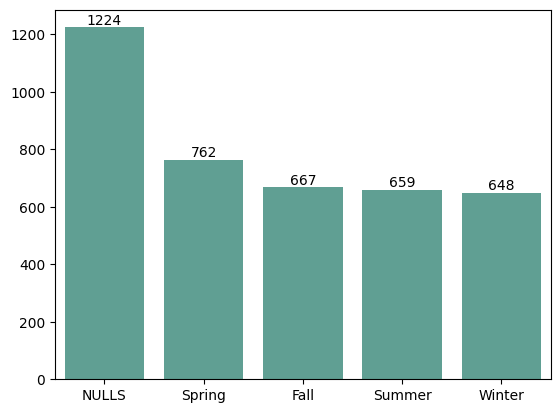

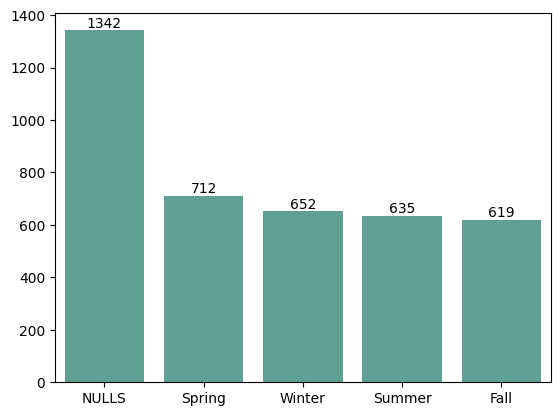

In [449]:
for i in seasons_cols:
    draw_barchart(i)

In [450]:
df.drop(columns=seasons_cols, inplace=True)

In [451]:
new_nulls = show_nulls(df)

#
---
#

## Getting Columns which have more than 70% Nulls

In [452]:
new_nulls[new_nulls["Percent"].map(lambda x : float(x[:-1])) > 70]

,Feature,Nulls,Percent
44,PAQ_A-PAQ_A_Total,3485,88.005%
12,Fitness_Endurance-Time_Mins,3220,81.313%
13,Fitness_Endurance-Time_Sec,3220,81.313%
11,Fitness_Endurance-Max_Stage,3217,81.237%
7,Physical-Waist_Circumference,3062,77.323%
17,FGC-FGC_GSND_Zone,2898,73.182%
19,FGC-FGC_GSD_Zone,2897,73.157%
18,FGC-FGC_GSD,2886,72.879%
16,FGC-FGC_GSND,2886,72.879%


In [453]:
df[new_nulls[new_nulls["Percent"].map(lambda x : float(x[:-1])) > 45]["Feature"]].head()

,PAQ_A-PAQ_A_Total,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,Fitness_Endurance-Max_Stage,Physical-Waist_Circumference,FGC-FGC_GSND_Zone,FGC-FGC_GSD_Zone,FGC-FGC_GSD,FGC-FGC_GSND,PAQ_C-PAQ_C_Total,BIA-BIA_FMI,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_Fat,BIA-BIA_Activity_Level_num,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,BIA-BIA_BMC,BIA-BIA_ECW
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.06143,16.8792,932.498,1492.00,41.5862,13.8177,9.21377,2.0,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,2.66855,8.25598
1,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,2.340,1.21172,14.0371,936.656,1498.65,42.0291,12.8254,3.97085,2.0,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,2.57949,6.01993
2,NaN,7.0,33.0,5.0,NaN,1.0,2.0,14.7,10.2,2.170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,9.0,37.0,6.0,NaN,NaN,NaN,NaN,NaN,2.451,4.22033,18.2943,1131.430,1923.44,62.7757,14.0740,18.82430,3.0,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,3.84191,15.59250
4,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [454]:
df.drop(columns=new_nulls[new_nulls["Percent"].map(lambda x : float(x[:-1])) > 45]["Feature"], inplace=True)

In [455]:
show_nulls(df)

,Feature,Nulls,Percent
15,FGC-FGC_SRL_Zone,1693,42.753%
17,FGC-FGC_SRR_Zone,1691,42.702%
13,FGC-FGC_PU_Zone,1689,42.652%
11,FGC-FGC_CU_Zone,1678,42.374%
19,FGC-FGC_TL_Zone,1675,42.298%
14,FGC-FGC_SRL,1655,41.793%
16,FGC-FGC_SRR,1653,41.742%
12,FGC-FGC_PU,1650,41.667%
10,FGC-FGC_CU,1638,41.364%
18,FGC-FGC_TL,1636,41.313%


#
---
#

## Doing Scaling on Datafram as we be using KNN Imputer

In [456]:
scaling_objects = {}

for i in df.drop(columns="id").columns:
    scaling_objects[i] = MinMaxScaler()
    scaled_vector = scaling_objects[i].fit_transform(df[[i]])
    df[i] = df[i].astype("float")
    df.loc[:, i] = scaled_vector

In [457]:
df.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,0.000000,0.0,0.026694,0.285417,0.285714,0.161270,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,0.322581,0.0,0.285714,0.0,0.272727,1.0,1.0,0.8,0.8,0.0,0.8,0.0,0.0,0.8,0.0,0.0,0.8,0.0,0.8,0.8,0.8,0.8,0.8,0.8,0.4,0.8,0.591398,NaN,NaN,1.000000
1,000fd460,0.235294,0.0,NaN,0.237360,0.329670,0.146032,0.418994,0.387387,0.600985,0.026087,0.0,0.098039,0.0,0.506912,1.0,0.523810,1.0,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.367089,0.419355,0.000000
2,00105258,0.294118,1.0,0.047228,0.281551,0.516484,0.240000,0.363128,0.603604,0.576355,0.173913,1.0,0.137255,1.0,0.460829,1.0,0.476190,1.0,0.227273,0.0,1.0,0.4,0.4,0.2,0.4,0.2,0.2,0.4,0.2,0.2,0.2,0.0,0.2,0.2,0.2,0.0,0.4,0.4,0.2,0.2,0.301075,0.265823,0.258065,0.666667
3,00115b9f,0.235294,0.0,0.047228,0.309347,0.505495,0.259048,0.335196,0.630631,0.576355,0.156522,1.0,0.098039,0.0,0.322581,0.0,0.333333,0.0,0.318182,1.0,0.8,0.4,0.8,0.0,1.0,0.2,0.0,0.6,0.4,0.4,0.6,0.0,0.6,0.0,0.0,0.6,0.8,0.6,0.8,0.2,0.473118,0.177215,0.112903,0.000000
4,0016bb22,0.764706,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#
---
#

## Filling nulls of `PreInt_EduHx-computerinternet_hoursday`

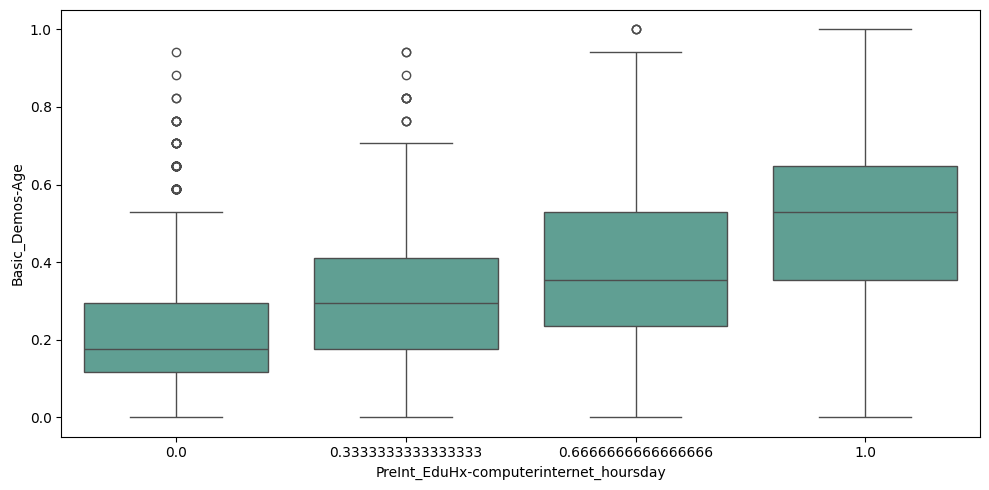

In [458]:
draw_boxplot(numData=df["Basic_Demos-Age"], catData=df["PreInt_EduHx-computerinternet_hoursday"])

In [459]:
fill_nulls(
    nullsDataFrame=df[["Basic_Demos-Age", "PreInt_EduHx-computerinternet_hoursday"]],
    colWithNulls="PreInt_EduHx-computerinternet_hoursday"
)

In [460]:
show_nulls(df)

,Feature,Nulls,Percent
15,FGC-FGC_SRL_Zone,1693,42.753%
17,FGC-FGC_SRR_Zone,1691,42.702%
13,FGC-FGC_PU_Zone,1689,42.652%
11,FGC-FGC_CU_Zone,1678,42.374%
19,FGC-FGC_TL_Zone,1675,42.298%
14,FGC-FGC_SRL,1655,41.793%
16,FGC-FGC_SRR,1653,41.742%
12,FGC-FGC_PU,1650,41.667%
10,FGC-FGC_CU,1638,41.364%
18,FGC-FGC_TL,1636,41.313%


#
---
#

## Filling nulls of `Physical-Weight`

In [461]:
df.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,0.000000,0.0,0.026694,0.285417,0.285714,0.161270,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,0.322581,0.0,0.285714,0.0,0.272727,1.0,1.0,0.8,0.8,0.0,0.8,0.0,0.0,0.8,0.0,0.0,0.8,0.0,0.8,0.8,0.8,0.8,0.8,0.8,0.4,0.8,0.591398,NaN,NaN,1.000000
1,000fd460,0.235294,0.0,NaN,0.237360,0.329670,0.146032,0.418994,0.387387,0.600985,0.026087,0.0,0.098039,0.0,0.506912,1.0,0.523810,1.0,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.367089,0.419355,0.000000
2,00105258,0.294118,1.0,0.047228,0.281551,0.516484,0.240000,0.363128,0.603604,0.576355,0.173913,1.0,0.137255,1.0,0.460829,1.0,0.476190,1.0,0.227273,0.0,1.0,0.4,0.4,0.2,0.4,0.2,0.2,0.4,0.2,0.2,0.2,0.0,0.2,0.2,0.2,0.0,0.4,0.4,0.2,0.2,0.301075,0.265823,0.258065,0.666667
3,00115b9f,0.235294,0.0,0.047228,0.309347,0.505495,0.259048,0.335196,0.630631,0.576355,0.156522,1.0,0.098039,0.0,0.322581,0.0,0.333333,0.0,0.318182,1.0,0.8,0.4,0.8,0.0,1.0,0.2,0.0,0.6,0.4,0.4,0.6,0.0,0.6,0.0,0.0,0.6,0.8,0.6,0.8,0.2,0.473118,0.177215,0.112903,0.000000
4,0016bb22,0.764706,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [462]:
fill_nulls(
    nullsDataFrame=df[["Basic_Demos-Age", "Physical-Weight"]],
    colWithNulls="Physical-Weight"
)

In [463]:
show_nulls(df)

,Feature,Nulls,Percent
15,FGC-FGC_SRL_Zone,1693,42.753%
17,FGC-FGC_SRR_Zone,1691,42.702%
13,FGC-FGC_PU_Zone,1689,42.652%
11,FGC-FGC_CU_Zone,1678,42.374%
19,FGC-FGC_TL_Zone,1675,42.298%
14,FGC-FGC_SRL,1655,41.793%
16,FGC-FGC_SRR,1653,41.742%
12,FGC-FGC_PU,1650,41.667%
10,FGC-FGC_CU,1638,41.364%
18,FGC-FGC_TL,1636,41.313%


#
---
#

## Filling nulls of `Physical Measures`

In [464]:
fill_nulls(
    nullsDataFrame=df[["Basic_Demos-Age", "Physical-Weight", "Physical-Height"]],
    colWithNulls="Physical-Height"
)

In [465]:
fill_nulls(
    nullsDataFrame=df[["Basic_Demos-Age", "Physical-Weight", "Physical-Height", "Physical-BMI"]],
    colWithNulls="Physical-BMI"
)

In [466]:
fill_nulls(
    nullsDataFrame=df[["Basic_Demos-Age", "Physical-Weight", "Physical-Height", "Physical-BMI", "Physical-HeartRate"]],
    colWithNulls="Physical-HeartRate"
)

In [467]:
fill_nulls(
    nullsDataFrame=df[["Basic_Demos-Age", "Physical-Weight", "Physical-Height", "Physical-BMI", "Physical-HeartRate", "Physical-Systolic_BP"]],
    colWithNulls="Physical-Systolic_BP"
)

In [468]:
fill_nulls(
    nullsDataFrame=df[["Basic_Demos-Age", "Physical-Weight", "Physical-Height", "Physical-BMI", "Physical-HeartRate", "Physical-Diastolic_BP"]],
    colWithNulls="Physical-Diastolic_BP"
)

#
---
#

## Filling nulls of `Parent-Child`

In [469]:
pciat_cols = list(filter(lambda x : x[:6] == "PCIAT-", df.columns))

In [470]:
df.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,0.000000,0.0,0.026694,0.285417,0.285714,0.161270,0.335196,0.558559,0.561576,0.000000,0.0,0.000000,0.0,0.322581,0.0,0.285714,0.0,0.272727,1.0,1.0,0.8,0.8,0.0,0.8,0.0,0.0,0.8,0.0,0.0,0.8,0.0,0.8,0.8,0.8,0.8,0.8,0.8,0.4,0.8,0.591398,NaN,NaN,1.000000
1,000fd460,0.235294,0.0,NaN,0.237360,0.329670,0.146032,0.418994,0.387387,0.600985,0.026087,0.0,0.098039,0.0,0.506912,1.0,0.523810,1.0,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.367089,0.419355,0.000000
2,00105258,0.294118,1.0,0.047228,0.281551,0.516484,0.240000,0.363128,0.603604,0.576355,0.173913,1.0,0.137255,1.0,0.460829,1.0,0.476190,1.0,0.227273,0.0,1.0,0.4,0.4,0.2,0.4,0.2,0.2,0.4,0.2,0.2,0.2,0.0,0.2,0.2,0.2,0.0,0.4,0.4,0.2,0.2,0.301075,0.265823,0.258065,0.666667
3,00115b9f,0.235294,0.0,0.047228,0.309347,0.505495,0.259048,0.335196,0.630631,0.576355,0.156522,1.0,0.098039,0.0,0.322581,0.0,0.333333,0.0,0.318182,1.0,0.8,0.4,0.8,0.0,1.0,0.2,0.0,0.6,0.4,0.4,0.6,0.0,0.6,0.0,0.0,0.6,0.8,0.6,0.8,0.2,0.473118,0.177215,0.112903,0.000000
4,0016bb22,0.764706,1.0,NaN,0.491074,0.813187,0.642540,0.497207,0.396396,0.694581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [471]:
pciat_cols = pciat_cols[:-1]
pciat_cols

['PCIAT-PCIAT_01',
 'PCIAT-PCIAT_02',
 'PCIAT-PCIAT_03',
 'PCIAT-PCIAT_04',
 'PCIAT-PCIAT_05',
 'PCIAT-PCIAT_06',
 'PCIAT-PCIAT_07',
 'PCIAT-PCIAT_08',
 'PCIAT-PCIAT_09',
 'PCIAT-PCIAT_10',
 'PCIAT-PCIAT_11',
 'PCIAT-PCIAT_12',
 'PCIAT-PCIAT_13',
 'PCIAT-PCIAT_14',
 'PCIAT-PCIAT_15',
 'PCIAT-PCIAT_16',
 'PCIAT-PCIAT_17',
 'PCIAT-PCIAT_18',
 'PCIAT-PCIAT_19',
 'PCIAT-PCIAT_20']

In [472]:
for i in pciat_cols:
    fill_nulls(
        nullsDataFrame = df[["Basic_Demos-Sex", "Basic_Demos-Age", i]],
        colWithNulls = i
    )

In [473]:
show_nulls(df)

,Feature,Nulls,Percent
15,FGC-FGC_SRL_Zone,1693,42.753%
17,FGC-FGC_SRR_Zone,1691,42.702%
13,FGC-FGC_PU_Zone,1689,42.652%
11,FGC-FGC_CU_Zone,1678,42.374%
19,FGC-FGC_TL_Zone,1675,42.298%
14,FGC-FGC_SRL,1655,41.793%
16,FGC-FGC_SRR,1653,41.742%
12,FGC-FGC_PU,1650,41.667%
10,FGC-FGC_CU,1638,41.364%
18,FGC-FGC_TL,1636,41.313%


In [474]:
df.head(10)

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,0.000000,0.0,0.026694,0.285417,0.285714,0.161270,0.335196,0.558559,0.561576,0.000000,0.0,0.000000,0.0,0.322581,0.0,0.285714,0.0,0.272727,1.0,1.0,0.8,0.8,0.0,0.8,0.0,0.0,0.8,0.0,0.0,0.8,0.0,0.8,0.8,0.8,0.8,0.8,0.8,0.4,0.8,0.591398,NaN,NaN,1.000000
1,000fd460,0.235294,0.0,NaN,0.237360,0.329670,0.146032,0.418994,0.387387,0.600985,0.026087,0.0,0.098039,0.0,0.506912,1.0,0.523810,1.0,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.367089,0.419355,0.000000
2,00105258,0.294118,1.0,0.047228,0.281551,0.516484,0.240000,0.363128,0.603604,0.576355,0.173913,1.0,0.137255,1.0,0.460829,1.0,0.476190,1.0,0.227273,0.0,1.0,0.4,0.4,0.2,0.4,0.2,0.2,0.4,0.2,0.2,0.2,0.0,0.2,0.2,0.2,0.0,0.4,0.4,0.2,0.2,0.301075,0.265823,0.258065,0.666667
3,00115b9f,0.235294,0.0,0.047228,0.309347,0.505495,0.259048,0.335196,0.630631,0.576355,0.156522,1.0,0.098039,0.0,0.322581,0.0,0.333333,0.0,0.318182,1.0,0.8,0.4,0.8,0.0,1.0,0.2,0.0,0.6,0.4,0.4,0.6,0.0,0.6,0.0,0.0,0.6,0.8,0.6,0.8,0.2,0.473118,0.177215,0.112903,0.000000
4,0016bb22,0.764706,1.0,NaN,0.491074,0.813187,0.642540,0.497207,0.396396,0.694581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,0.8,0.8,0.0,1.0,0.0,0.8,1.0,0.0,0.8,1.0,0.0,0.6,0.8,0.8,0.8,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.000000
5,001f3379,0.470588,1.0,0.025667,0.376783,0.582418,0.356190,0.335196,0.414414,0.502463,0.104348,0.0,0.117647,0.0,0.460829,1.0,0.523810,1.0,0.363636,0.0,0.6,0.6,0.6,0.0,0.4,0.2,0.0,0.4,0.4,0.2,0.0,0.2,0.6,0.6,0.4,0.2,0.6,0.2,0.4,0.2,0.365591,0.291139,0.290323,0.000000
6,0038ba98,0.294118,0.0,NaN,0.332489,0.483516,0.268571,0.687151,0.504505,0.802956,0.078261,1.0,0.039216,0.0,0.506912,1.0,0.523810,1.0,0.500000,1.0,0.2,0.8,0.2,0.0,0.4,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.2,0.8,0.2,0.0,0.215054,0.126582,0.032258,1.000000
7,0068a485,0.294118,1.0,NaN,0.285146,0.576923,0.267302,0.396648,0.567568,0.571429,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.181818,0.0,0.0,0.4,0.4,0.0,0.4,0.4,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.0,NaN,NaN,NaN,0.666667
8,0069fbed,0.588235,0.0,NaN,0.320892,0.714286,0.367619,0.307263,0.369369,0.463054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,0.4,0.8,0.2,0.4,0.2,0.2,0.2,0.4,0.2,0.4,0.2,0.4,0.2,0.2,0.4,0.2,0.4,0.0,0.4,NaN,NaN,NaN,0.666667
9,0083e397,0.823529,1.0,NaN,0.520787,0.615385,0.517460,0.435754,0.513514,0.596059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1.0,1.0,0.0,0.6,0.6,0.4,0.4,0.0,0.4,0.4,0.4,0.4,0.4,0.6,0.0,0.0,0.0,0.6,0.0,NaN,NaN,NaN,1.000000


In [475]:
df[pciat_cols].head().sum(axis=1)

0    11.0
1     0.0
2     5.6
3     8.8
4    10.0
dtype: float64

In [476]:
new_pciat_df = pd.DataFrame(index=range(0, df.shape[0]))

for i in pciat_cols:
    new_pciat_df[i] = scaling_objects[i].inverse_transform(df[[i]])

In [477]:
tot = pd.DataFrame(new_pciat_df.sum(axis=1), columns=["PCIAT-PCIAT_Total"])

In [478]:
df.loc[:, "PCIAT-PCIAT_Total"] = scaling_objects['PCIAT-PCIAT_Total'].transform(tot[["PCIAT-PCIAT_Total"]])

In [479]:
df.head(10)

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,0.000000,0.0,0.026694,0.285417,0.285714,0.161270,0.335196,0.558559,0.561576,0.000000,0.0,0.000000,0.0,0.322581,0.0,0.285714,0.0,0.272727,1.0,1.0,0.8,0.8,0.0,0.8,0.0,0.0,0.8,0.0,0.0,0.8,0.0,0.8,0.8,0.8,0.8,0.8,0.8,0.4,0.8,0.591398,NaN,NaN,1.000000
1,000fd460,0.235294,0.0,NaN,0.237360,0.329670,0.146032,0.418994,0.387387,0.600985,0.026087,0.0,0.098039,0.0,0.506912,1.0,0.523810,1.0,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.367089,0.419355,0.000000
2,00105258,0.294118,1.0,0.047228,0.281551,0.516484,0.240000,0.363128,0.603604,0.576355,0.173913,1.0,0.137255,1.0,0.460829,1.0,0.476190,1.0,0.227273,0.0,1.0,0.4,0.4,0.2,0.4,0.2,0.2,0.4,0.2,0.2,0.2,0.0,0.2,0.2,0.2,0.0,0.4,0.4,0.2,0.2,0.301075,0.265823,0.258065,0.666667
3,00115b9f,0.235294,0.0,0.047228,0.309347,0.505495,0.259048,0.335196,0.630631,0.576355,0.156522,1.0,0.098039,0.0,0.322581,0.0,0.333333,0.0,0.318182,1.0,0.8,0.4,0.8,0.0,1.0,0.2,0.0,0.6,0.4,0.4,0.6,0.0,0.6,0.0,0.0,0.6,0.8,0.6,0.8,0.2,0.473118,0.177215,0.112903,0.000000
4,0016bb22,0.764706,1.0,NaN,0.491074,0.813187,0.642540,0.497207,0.396396,0.694581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,0.8,0.8,0.0,1.0,0.0,0.8,1.0,0.0,0.8,1.0,0.0,0.6,0.8,0.8,0.8,0.0,0.0,0.0,0.0,0.537634,NaN,NaN,1.000000
5,001f3379,0.470588,1.0,0.025667,0.376783,0.582418,0.356190,0.335196,0.414414,0.502463,0.104348,0.0,0.117647,0.0,0.460829,1.0,0.523810,1.0,0.363636,0.0,0.6,0.6,0.6,0.0,0.4,0.2,0.0,0.4,0.4,0.2,0.0,0.2,0.6,0.6,0.4,0.2,0.6,0.2,0.4,0.2,0.365591,0.291139,0.290323,0.000000
6,0038ba98,0.294118,0.0,NaN,0.332489,0.483516,0.268571,0.687151,0.504505,0.802956,0.078261,1.0,0.039216,0.0,0.506912,1.0,0.523810,1.0,0.500000,1.0,0.2,0.8,0.2,0.0,0.4,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.2,0.8,0.2,0.0,0.215054,0.126582,0.032258,1.000000
7,0068a485,0.294118,1.0,NaN,0.285146,0.576923,0.267302,0.396648,0.567568,0.571429,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.181818,0.0,0.0,0.4,0.4,0.0,0.4,0.4,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.0,0.150538,NaN,NaN,0.666667
8,0069fbed,0.588235,0.0,NaN,0.320892,0.714286,0.367619,0.307263,0.369369,0.463054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,0.4,0.8,0.2,0.4,0.2,0.2,0.2,0.4,0.2,0.4,0.2,0.4,0.2,0.2,0.4,0.2,0.4,0.0,0.4,0.333333,NaN,NaN,0.666667
9,0083e397,0.823529,1.0,NaN,0.520787,0.615385,0.517460,0.435754,0.513514,0.596059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1.0,1.0,0.0,0.6,0.6,0.4,0.4,0.0,0.4,0.4,0.4,0.4,0.4,0.6,0.0,0.0,0.0,0.6,0.0,0.408602,NaN,NaN,1.000000


In [480]:
show_nulls(df)

,Feature,Nulls,Percent
15,FGC-FGC_SRL_Zone,1693,42.753%
17,FGC-FGC_SRR_Zone,1691,42.702%
13,FGC-FGC_PU_Zone,1689,42.652%
11,FGC-FGC_CU_Zone,1678,42.374%
19,FGC-FGC_TL_Zone,1675,42.298%
14,FGC-FGC_SRL,1655,41.793%
16,FGC-FGC_SRR,1653,41.742%
12,FGC-FGC_PU,1650,41.667%
10,FGC-FGC_CU,1638,41.364%
18,FGC-FGC_TL,1636,41.313%


#
---
#

## Filling nulls of `Sleep Disturbance Scale`

In [481]:
fill_nulls(
        nullsDataFrame = df[["Basic_Demos-Sex", "Basic_Demos-Age", "PCIAT-PCIAT_Total", "SDS-SDS_Total_Raw"]],
        colWithNulls = "SDS-SDS_Total_Raw"
    )

In [482]:
fill_nulls(
        nullsDataFrame = df[["Basic_Demos-Sex", "Basic_Demos-Age", "PCIAT-PCIAT_Total", "SDS-SDS_Total_T"]],
        colWithNulls = "SDS-SDS_Total_T"
    )

#
---
#

## Filling nulls of `CGAS-CGAS_Score`

In [483]:
df.head(20)

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,0.000000,0.0,0.026694,0.285417,0.285714,0.161270,0.335196,0.558559,0.561576,0.000000,0.0,0.000000,0.0,0.322581,0.0,0.285714,0.0,0.272727,1.0,1.0,0.8,0.8,0.0,0.8,0.0,0.0,0.8,0.0,0.0,0.8,0.0,0.8,0.8,0.8,0.8,0.8,0.8,0.4,0.8,0.591398,0.392405,0.467742,1.000000
1,000fd460,0.235294,0.0,NaN,0.237360,0.329670,0.146032,0.418994,0.387387,0.600985,0.026087,0.0,0.098039,0.0,0.506912,1.0,0.523810,1.0,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.367089,0.419355,0.000000
2,00105258,0.294118,1.0,0.047228,0.281551,0.516484,0.240000,0.363128,0.603604,0.576355,0.173913,1.0,0.137255,1.0,0.460829,1.0,0.476190,1.0,0.227273,0.0,1.0,0.4,0.4,0.2,0.4,0.2,0.2,0.4,0.2,0.2,0.2,0.0,0.2,0.2,0.2,0.0,0.4,0.4,0.2,0.2,0.301075,0.265823,0.258065,0.666667
3,00115b9f,0.235294,0.0,0.047228,0.309347,0.505495,0.259048,0.335196,0.630631,0.576355,0.156522,1.0,0.098039,0.0,0.322581,0.0,0.333333,0.0,0.318182,1.0,0.8,0.4,0.8,0.0,1.0,0.2,0.0,0.6,0.4,0.4,0.6,0.0,0.6,0.0,0.0,0.6,0.8,0.6,0.8,0.2,0.473118,0.177215,0.112903,0.000000
4,0016bb22,0.764706,1.0,NaN,0.491074,0.813187,0.642540,0.497207,0.396396,0.694581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,0.8,0.8,0.0,1.0,0.0,0.8,1.0,0.0,0.8,1.0,0.0,0.6,0.8,0.8,0.8,0.0,0.0,0.0,0.0,0.537634,0.240506,0.209677,1.000000
5,001f3379,0.470588,1.0,0.025667,0.376783,0.582418,0.356190,0.335196,0.414414,0.502463,0.104348,0.0,0.117647,0.0,0.460829,1.0,0.523810,1.0,0.363636,0.0,0.6,0.6,0.6,0.0,0.4,0.2,0.0,0.4,0.4,0.2,0.0,0.2,0.6,0.6,0.4,0.2,0.6,0.2,0.4,0.2,0.365591,0.291139,0.290323,0.000000
6,0038ba98,0.294118,0.0,NaN,0.332489,0.483516,0.268571,0.687151,0.504505,0.802956,0.078261,1.0,0.039216,0.0,0.506912,1.0,0.523810,1.0,0.500000,1.0,0.2,0.8,0.2,0.0,0.4,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.2,0.8,0.2,0.0,0.215054,0.126582,0.032258,1.000000
7,0068a485,0.294118,1.0,NaN,0.285146,0.576923,0.267302,0.396648,0.567568,0.571429,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.181818,0.0,0.0,0.4,0.4,0.0,0.4,0.4,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.0,0.150538,0.164557,0.080645,0.666667
8,0069fbed,0.588235,0.0,NaN,0.320892,0.714286,0.367619,0.307263,0.369369,0.463054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,0.4,0.8,0.2,0.4,0.2,0.2,0.2,0.4,0.2,0.4,0.2,0.4,0.2,0.2,0.4,0.2,0.4,0.0,0.4,0.333333,0.164557,0.080645,0.666667
9,0083e397,0.823529,1.0,NaN,0.520787,0.615385,0.517460,0.435754,0.513514,0.596059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1.0,1.0,0.0,0.6,0.6,0.4,0.4,0.0,0.4,0.4,0.4,0.4,0.4,0.6,0.0,0.0,0.0,0.6,0.0,0.408602,0.468354,0.596774,1.000000


In [484]:
remaining_nulls = list(show_nulls(df)[show_nulls(df)["Percent"].map(lambda x : float(x[:-1])) > 0]["Feature"])

In [485]:
for i in remaining_nulls:
    fill_nulls(
        nullsDataFrame = df[["Basic_Demos-Sex", "Basic_Demos-Age", i]],
        colWithNulls = i
    )

In [486]:
show_nulls(df)

,Feature,Nulls,Percent
0,id,0,0.000%
1,Basic_Demos-Age,0,0.000%
24,PCIAT-PCIAT_05,0,0.000%
25,PCIAT-PCIAT_06,0,0.000%
26,PCIAT-PCIAT_07,0,0.000%
27,PCIAT-PCIAT_08,0,0.000%
28,PCIAT-PCIAT_09,0,0.000%
29,PCIAT-PCIAT_10,0,0.000%
30,PCIAT-PCIAT_11,0,0.000%
31,PCIAT-PCIAT_12,0,0.000%


#
---
#

In [497]:
old_pad = df[["id"]]
old_pad["sii"] = target

C:\Users\DILEEP PATCHA\AppData\Local\Temp\ipykernel_20744\3967943680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_pad["sii"] = target


In [498]:
old_pad.head()

,id,sii
0,00008ff9,2.0
1,000fd460,0.0
2,00105258,0.0
3,00115b9f,1.0
4,0016bb22,NaN


In [499]:
df.drop(columns="id", inplace=True)

#
---
#

## Model

In [500]:
from sklearn.cluster import AgglomerativeClustering

In [501]:
cluster = AgglomerativeClustering(n_clusters=4)

In [504]:
labels = cluster.fit_predict(df)

In [507]:
old_pad["predicted_sii"] = labels

C:\Users\DILEEP PATCHA\AppData\Local\Temp\ipykernel_20744\2421490834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_pad["predicted_sii"] = labels


In [520]:
main = old_pad[~(old_pad["sii"].isnull())]

In [521]:
main[main["sii"] == 0.0]["predicted_sii"].value_counts()

predicted_sii
3    774
2    572
1    245
0      3
Name: count, dtype: int64

In [522]:
main[main["sii"] == 1.0]["predicted_sii"].value_counts()

predicted_sii
1    390
2    176
0    110
3     54
Name: count, dtype: int64

In [523]:
main[main["sii"] == 2.0]["predicted_sii"].value_counts()

predicted_sii
0    304
1     64
2     10
Name: count, dtype: int64

In [524]:
main[main["sii"] == 3.0]["predicted_sii"].value_counts()

predicted_sii
0    34
Name: count, dtype: int64

In [525]:
main["sii"].value_counts()

sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64

sii ----> Predicted_sii
0---->3
1---->1
2---->0
3---->2

In [541]:
new_df = df.copy()
new_df["id"] = old_pad["id"]
new_df["sii"] = old_pad["sii"]
new_df["predicted_sii"] = old_pad["predicted_sii"]

In [563]:
new_df["predicted_sii"].replace({
    3 : 0,
    0 : 2,
    2 : 3
}, inplace=True)

C:\Users\DILEEP PATCHA\AppData\Local\Temp\ipykernel_20744\3005572354.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [564]:
new_df.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,id,sii,predicted_sii
0,0.000000,0.0,0.026694,0.285417,0.285714,0.161270,0.335196,0.558559,0.561576,0.000000,0.0,0.000000,0.0,0.322581,0.0,0.285714,0.0,0.272727,1.0,1.0,0.8,0.8,0.0,0.8,0.0,0.0,0.8,0.0,0.0,0.8,0.0,0.8,0.8,0.8,0.8,0.8,0.8,0.4,0.8,0.591398,0.392405,0.467742,1.000000,00008ff9,2.0,2
1,0.235294,0.0,0.047228,0.237360,0.329670,0.146032,0.418994,0.387387,0.600985,0.026087,0.0,0.098039,0.0,0.506912,1.0,0.523810,1.0,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.367089,0.419355,0.000000,000fd460,0.0,0
2,0.294118,1.0,0.047228,0.281551,0.516484,0.240000,0.363128,0.603604,0.576355,0.173913,1.0,0.137255,1.0,0.460829,1.0,0.476190,1.0,0.227273,0.0,1.0,0.4,0.4,0.2,0.4,0.2,0.2,0.4,0.2,0.2,0.2,0.0,0.2,0.2,0.2,0.0,0.4,0.4,0.2,0.2,0.301075,0.265823,0.258065,0.666667,00105258,0.0,0
3,0.235294,0.0,0.047228,0.309347,0.505495,0.259048,0.335196,0.630631,0.576355,0.156522,1.0,0.098039,0.0,0.322581,0.0,0.333333,0.0,0.318182,1.0,0.8,0.4,0.8,0.0,1.0,0.2,0.0,0.6,0.4,0.4,0.6,0.0,0.6,0.0,0.0,0.6,0.8,0.6,0.8,0.2,0.473118,0.177215,0.112903,0.000000,00115b9f,1.0,2
4,0.764706,1.0,0.035934,0.491074,0.813187,0.642540,0.497207,0.396396,0.694581,0.060870,1.0,0.294118,1.0,0.276498,0.0,0.380952,0.0,0.545455,1.0,0.8,0.8,0.8,0.0,1.0,0.0,0.8,1.0,0.0,0.8,1.0,0.0,0.6,0.8,0.8,0.8,0.0,0.0,0.0,0.0,0.537634,0.240506,0.209677,1.000000,0016bb22,NaN,3


In [565]:
# new_df = new_df[(new_df["sii"] == 3.0) | (new_df["sii"] == 2.0)]

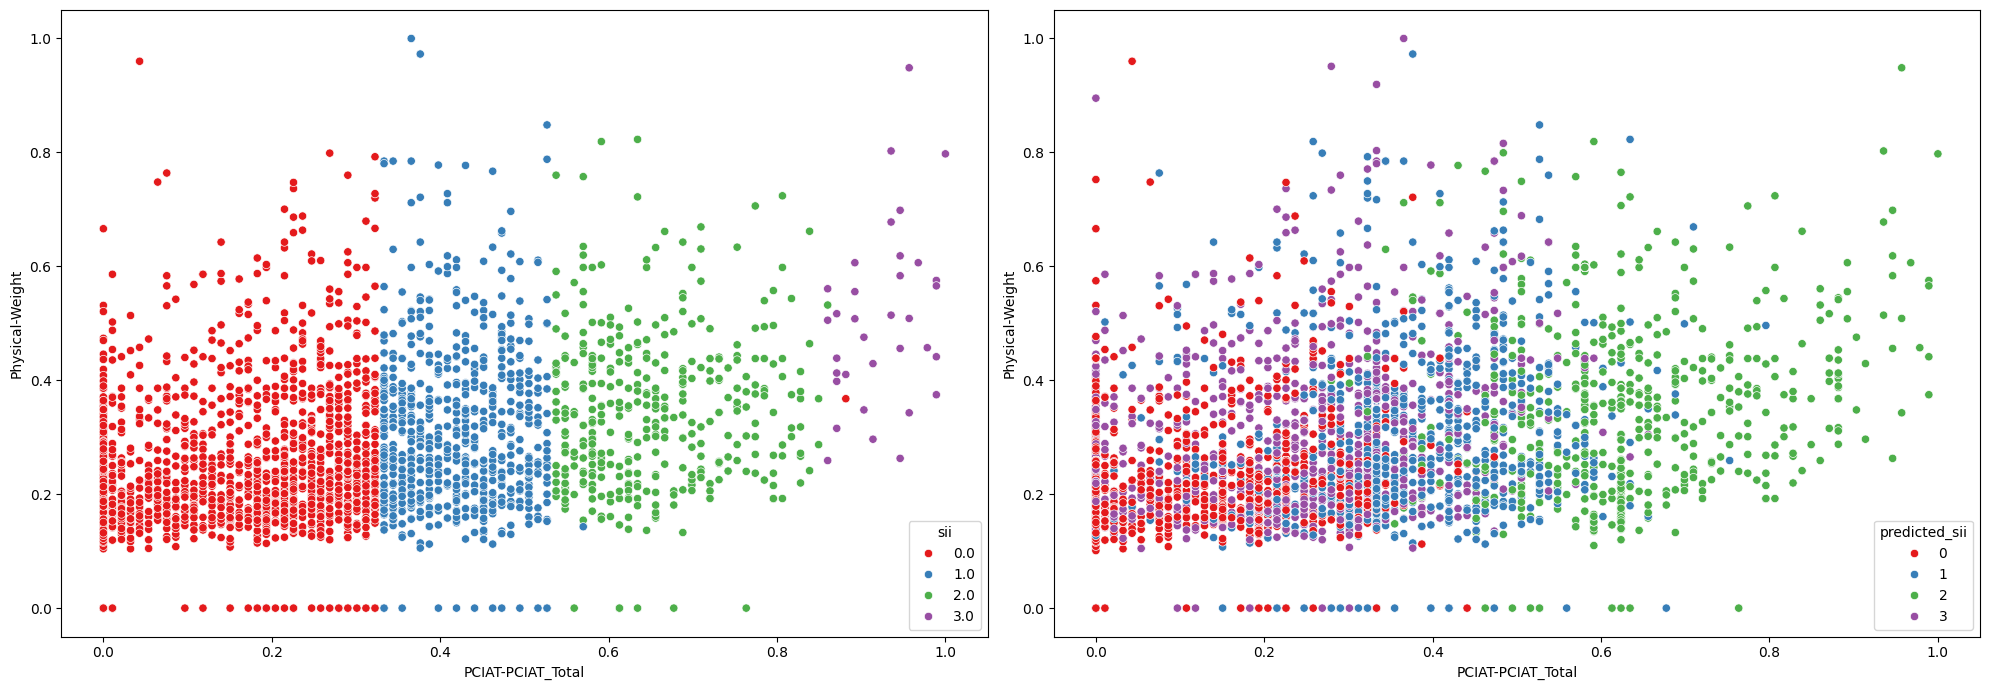

In [566]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x=new_df["PCIAT-PCIAT_Total"], y=new_df["Physical-Weight"], hue=new_df["sii"], palette='Set1')

plt.subplot(1, 2, 2)
sns.scatterplot(x=new_df["PCIAT-PCIAT_Total"], y=new_df["Physical-Weight"], hue=new_df["predicted_sii"], palette='Set1')


plt.tight_layout()
plt.show()

In [549]:
new_df.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,id,sii,predicted_sii
0,0.000000,0.0,0.026694,0.285417,0.285714,0.161270,0.335196,0.558559,0.561576,0.000000,0.0,0.000000,0.0,0.322581,0.0,0.285714,0.0,0.272727,1.0,1.0,0.8,0.8,0.0,0.8,0.0,0.0,0.8,0.0,0.0,0.8,0.0,0.8,0.8,0.8,0.8,0.8,0.8,0.4,0.8,0.591398,0.392405,0.467742,1.000000,00008ff9,2.0,0
1,0.235294,0.0,0.047228,0.237360,0.329670,0.146032,0.418994,0.387387,0.600985,0.026087,0.0,0.098039,0.0,0.506912,1.0,0.523810,1.0,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.367089,0.419355,0.000000,000fd460,0.0,3
2,0.294118,1.0,0.047228,0.281551,0.516484,0.240000,0.363128,0.603604,0.576355,0.173913,1.0,0.137255,1.0,0.460829,1.0,0.476190,1.0,0.227273,0.0,1.0,0.4,0.4,0.2,0.4,0.2,0.2,0.4,0.2,0.2,0.2,0.0,0.2,0.2,0.2,0.0,0.4,0.4,0.2,0.2,0.301075,0.265823,0.258065,0.666667,00105258,0.0,3
3,0.235294,0.0,0.047228,0.309347,0.505495,0.259048,0.335196,0.630631,0.576355,0.156522,1.0,0.098039,0.0,0.322581,0.0,0.333333,0.0,0.318182,1.0,0.8,0.4,0.8,0.0,1.0,0.2,0.0,0.6,0.4,0.4,0.6,0.0,0.6,0.0,0.0,0.6,0.8,0.6,0.8,0.2,0.473118,0.177215,0.112903,0.000000,00115b9f,1.0,0
4,0.764706,1.0,0.035934,0.491074,0.813187,0.642540,0.497207,0.396396,0.694581,0.060870,1.0,0.294118,1.0,0.276498,0.0,0.380952,0.0,0.545455,1.0,0.8,0.8,0.8,0.0,1.0,0.0,0.8,1.0,0.0,0.8,1.0,0.0,0.6,0.8,0.8,0.8,0.0,0.0,0.0,0.0,0.537634,0.240506,0.209677,1.000000,0016bb22,NaN,2


#
---
#

# Test Data

In [568]:
test = pd.read_csv("../data/test.csv")

In [569]:
test

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,NaN,60.0,73.0,102.0,NaN,NaN,NaN,NaN,Summer,12.0,0.0,16.5,2.0,17.9,2.0,6.0,0.0,10.0,1.0,11.0,1.0,8.0,0.0,Summer,2.0,4.33036,30.1865,1330.970,1996.45,30.21240,84.0285,16.6877,13.49880,67.97150,2.0,32.9141,20.90200,79.6982,35.3804,63.1265,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,NaN,123.0,83.0,163.0,NaN,NaN,NaN,NaN,Fall,9.0,1.0,NaN,NaN,NaN,NaN,2.0,0.0,11.0,1.0,11.0,1.0,11.0,1.0,Fall,2.0,3.78271,19.6629,1135.860,1817.38,16.32750,63.2470,14.7000,4.96291,21.35300,2.0,30.8936,16.02590,59.4643,26.1957,47.2211,NaN,NaN,Winter,3.670,Winter,27.0,40.0,Fall,3.0
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,27.0,71.0,90.0,116.0,NaN,NaN,NaN,NaN,Fall,0.0,0.0,12.6,2.0,11.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,Fall,3.0,4.05726,16.8631,1180.040,1888.06,21.94000,67.9527,13.6092,3.25395,16.24740,2.0,28.5367,17.47600,63.8954,28.7680,50.4767,NaN,NaN,Fall,1.270,NaN,NaN,NaN,Fall,2.0
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [570]:
show_nulls(test)

,Feature,Nulls,Percent
51,PAQ_A-PAQ_A_Total,19,95.000%
50,PAQ_A-Season,19,95.000%
17,Fitness_Endurance-Time_Sec,17,85.000%
16,Fitness_Endurance-Time_Mins,17,85.000%
15,Fitness_Endurance-Max_Stage,17,85.000%
14,Fitness_Endurance-Season,16,80.000%
21,FGC-FGC_GSND,15,75.000%
23,FGC-FGC_GSD,15,75.000%
24,FGC-FGC_GSD_Zone,15,75.000%
10,Physical-Waist_Circumference,15,75.000%


In [571]:
test.drop(columns="PreInt_EduHx-Season", inplace=True)

In [575]:
test.drop(columns=seasons_cols, inplace=True, errors="ignore")